# Gradient Descent

[link](https://ut.philkr.net/deeplearning/deep_networks/stochastic_gradient_descent/)

## Theorem: The Gradient is the Direction of Maximal Increase
  
If $f : \mathbb{R}^n \to \mathbb{R}$ is differentiable at $x$, then:

1. For every unit vector $u$,
   $$
   D_u f(x) = \nabla f(x) \cdot u.
   $$
   where $D_u f$ denotes the derivative of $f$ in the direction of $u$.

2. Among all unit vectors $u$, the quantity $D_u f(x)$ is maximized when  
   $$
   u = \frac{\nabla f(x)}{\|\nabla f(x)\|} \quad (\nabla f(x) \neq 0),
   $$  
   and the maximal value is  
   $$
   \max_{\|u\| = 1} D_u f(x) = \|\nabla f(x)\|.
   $$

3. Among all unit vectors $u$, the quantity $D_u f(x)$ is minimized when  
   $$
   u = -\frac{\nabla f(x)}{\|\nabla f(x)\|} \quad (\nabla f(x) \neq 0),
   $$  
   and the minimal value is  
   $$
   \min_{\|u\| = 1} D_u f(x) = -\|\nabla f(x)\|.
   $$



**Proof 1:**. Directional derivative as inner product

For a unit vector $u \in \mathbb{R}^n$, the directional derivative of $f$ at $x$ in the direction $u$ is defined as:

$$
D_u f(x) = \lim_{h \to 0} \frac{f(x + h u) - f(x)}{h}.
$$

Since $f$ is differentiable at $x$, we have the first-order expansion:

$$
f(x + h u) = f(x) + h \, \nabla f(x) \cdot u + o(h).
$$

Thus:

$$
\frac{f(x + h u) - f(x)}{h}
= \nabla f(x) \cdot u + \frac{o(h)}{h}.
$$

Taking $h \to 0$ gives:

$$
D_u f(x) = \nabla f(x) \cdot u.
$$

**Proof 2,3:** 

By applying the Cauchy–Schwarz inequality to the equality in (1.), for any unit vector $u$, we have

$$
|D_u f(x)|= |\nabla f(x)\cdot u| \le \|\nabla f(x)\| \, \|u\| = \|\nabla f(x)\|.
$$

Thus,

$$
-\|\nabla f(x)\| \le D_u f(x) \le \|\nabla f(x)\|, \quad \forall u : \|u\| = 1.
$$
In addition equality in Cauchy–Schwarz holds if and only if $v = \alpha \nabla f(x)$, for some $\alpha\in \mathbb{R}$. Since $\|v\|=1$, we get $|\alpha|=\frac{1}{\|\nabla f(x)\|}$ and consequently $\alpha=\pm \frac{1}{\|\nabla f(x)\|}$. So, maximum and minimum are achieved only at $v_{1,2}= \pm \frac{\nabla f(x)}{\|\nabla f(x)\|}$. By simple evaluation we get the result
$$
D_{v_{1,2}} f(x)=\nabla f(x)^{T}\cdot \frac{\pm\nabla f(x)}{\|\nabla f(x)\|}=\pm\frac{\|\nabla f(x)\|^2}{\|\nabla f(x)\|}= \pm\|\nabla f(x)\|.
$$

## Definition: Gradient Descent 
We want to minimize a loss function

$$
L(\theta|\{x_i,y_i\}_{i=1}^{N}) = \frac{1}{N} \sum_{i=1}^N \ell(\theta| x_i, y_i).
$$


### 1. Full-Batch Gradient Descent 

$$
\theta_{t+1} = \theta_t - \eta_t \, \nabla_\theta L(\theta_t).
$$

### 2. Stochastic Gradient Descent (single sample)

At iteration $t$, pick a random index $i_t \sim \{1,\dots,N\}$:

$$
\theta_{t+1}
= \theta_t - \eta_t \, \nabla_\theta \ell(\theta_t; x_{i_t}, y_{i_t}).
$$

###  3. Mini-Batch Stochastic Gradient Descent

Take a random set of index $B_t\subset\{1,2,\dots,N\}$ of size $m$:

$$
\theta_{t+1}
= \theta_t
- \eta_t \, \frac{1}{|B_t|}
  \sum_{i \in B_t}
  \nabla_\theta \ell(\theta_t; x_i, y_i).
$$

### Property: Gradient Variance decreases with batch size

Let's denote by $\mathcal{B}_i$ the $i$-th batch which is uniformly randomly selected and each sample $(X,Y)=(x,y)$ is uniformly randomly selected in the batch. Let's denote $\sigma^2_{S}$ and $\sigma^2_{MB}$ the variances of the SGD and mini-batch GD algorithms respectively  

$$
\begin{align*}
\sigma^2_{S}&=\mathbb{V}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right],\\
\sigma^2_{MB}&=\mathbb{V}\left[\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right].
\end{align*}
$$
Then
$$
\begin{align*}
\sigma^2_{S}\ge \sigma^2_{MB}.
\end{align*}
$$

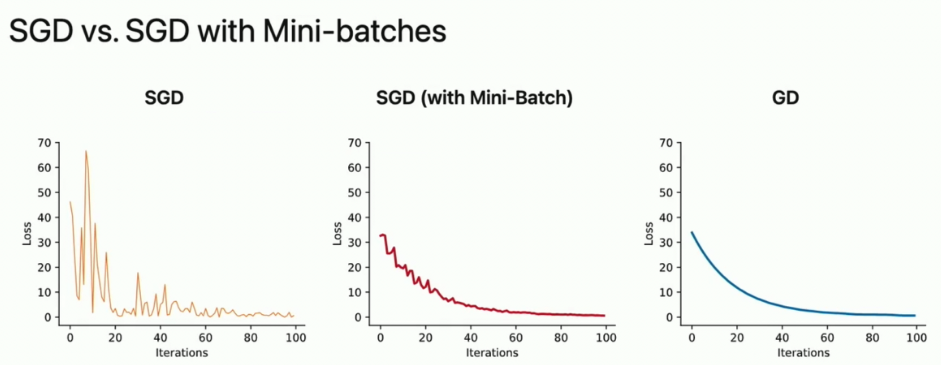

**Proof:** Consither the random variable
$$
\begin{align*}
Z(i) = \mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right],
\end{align*}
$$
where $\ell$ is the loss funciton and $\theta$ are the learnable model parameters.

From the Law of total expectation, we have

$$
\begin{align*}
\mathbb{E}\left[\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right]=\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right],
\end{align*}
$$

then we have that the variance of minibatch-SGD is 
$$
\begin{align*}
\sigma^2_{MB}&=\mathbb{E}[(Z-\mathbb{E}[Z])^2]=\mathbb{E}[Z^2]-\mathbb{E}[Z]^2,\\
&=\mathbb{E}\left[\left(\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right)^2\right]-\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right]^2
\end{align*}
$$

If we take bathch_size = 1, then $X,Y\in\mathcal{B}_i$ is deterministic and  we get that the SGD variance is 

$$
\begin{align*}
\sigma^2_{S}&=\mathbb{E}\left[\left(\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right)^2\right]-\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right]^2,\\
&=\mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]-\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right]^2
\end{align*}
$$

Then, the variance reduction is

$$
\begin{align*}
\sigma^2_{S}-\sigma_{MB}^2&=\mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]- \mathbb{E}\left[\left(\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right)^2\right],\\
&\geq \mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]- \mathbb{E}\left[\mathbb{E}\left[\left(\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right| X,Y \in \mathcal{B}_i\right]\right],\\
&= \mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]- \mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right],\\
&=0.
\end{align*}
$$

Then we have proved that minibatch GD never increases the variance of SGD: $\sigma^2_{S}\geq \sigma^2_{MB}$.

## Definition: SGD with Momentum

We consider a loss function $L(\theta)$ and its (stochastic) gradient at step $t$,
$$
g_t = \nabla_\theta L(\theta_t),
$$
where the gradient acts like a force that pushes the velocity in the descent direction.

Momentum introduces a **velocity** vector $v_t$ that accumulates past forces, giving the update a physics-like interpretation:
$$
\begin{align*}
v_0 &= 0,\\[4pt]
v_{t+1} &= \mu v_t + g_t,\\[4pt]
\theta_{t+1} &= \theta_t - \eta\, v_{t+1},
\end{align*}
$$

where $\eta > 0$ is the learning rate and $\mu \in [0,1)$ controls how much past velocity is preserved.

### Property: Old gradients are exponentially forgotten (their weight decays like $\alpha^k$).
$$
v_{n+1} = \sum_{i=0}^n \mu^{n-i} g_{i}
$$
Intuitively, momentum lets the optimizer “build up speed” in directions where many gradients agree, which reduces zig-zagging and speeds up progress through flat regions.

**Proof:** Let's prove it by induction on $n$. 

For $n=0$, we have $v_{1}=\mu v_0+g_0=g_0$ on the left side, and on the right side we have 
$$\sum_{i=0}^0\mu^{0-i}g_{i}=\mu^{0-0}g_0=g_0,$$
so the equality is true for $n=0$.

Let's prove the induction step, assume the equation is true for $n-1$, then we have

$$
\begin{align*}
v_{n+1} &= \mu v_{n} + g_{n},\\
&= \mu\sum_{i=0}^{n-1} \mu^{n-1-i} g_i + g_{n},\\
&= \sum_{i=0}^{n-1} \mu^{n-i} g_i+ 
u^0g_{n},\\
&= \sum_{i=0}^{n} \mu^{n-i} g_i.
\end{align*}
$$
so it is also true for $n$ and the inducion is completed.

## Definition: SGD with damped momentum
Dampening scales down the new gradient in the momentum update, making the step less aggressive. In practice, dampening is rarely needed in modern deep learning because the learning rate and momentum hyperparameters already provide equivalent control. It remains mostly for historical completeness rather than mathematical necessity.

$$
v_{t+1} = \mu v_t + (1 - \delta) g_t,
\qquad v_0 = 0,
$$

## Definition: SGD with Nesterov Momentum

Nesterov momentum improves classical momentum by *predicting* where momentum is about to move the parameters and then computing the gradient at that “future” position. This anticipatory step makes the correction earlier and more accurate, which reduces overshooting and typically leads to faster convergence.

We first compute the look-ahead position (before applying the new gradient):
$$
\hat\theta_t = \theta_t - \eta \mu v_t.
$$

We then compute the gradient at this look-ahead point:
$$
\hat{g}_t = \nabla_\theta L(\hat\theta_t).
$$

Finally, we update the velocity and the parameters just like in classical momentum:
$$
\begin{align*}
v_{t+1} &= \mu v_t + \hat{g}_t,\\
\theta_{t+1} &= \theta_t - \eta\, v_{t+1}.
\end{align*}
$$


## PyTorch’s Nesterov-Style Algorithm

The update implemented in PyTorch when `nesterov=True` is **not** the classical
Nesterov Accelerated Gradient (NAG). It is a **Nesterov-style momentum
heuristic**: inspired by the idea of looking ahead, but not mathematically
derived from the original algorithm.

PyTorch does **not** compute the displaced gradient $\hat g_t$. Instead, it uses
the usual gradient $g_t = \nabla L(\theta_t)$ and applies the heuristic update:
$$
\begin{align*}
d_t &= g_t + \mu v_{t+1},\\
\theta_{t+1} &= \theta_t - \eta\, d_t.
\end{align*}
$$

This rule is **not** an approximation of true Nesterov and is **not**
mathematically equivalent. It is an engineering shortcut (Sutskever et al.,
2013) that imitates the early-correction behavior of Nesterov without having
to temporarily move the parameters to a look-ahead position and restore them,
which would require copying all model weights every iteration.

Deep-learning libraries (PyTorch, TensorFlow, JAX, Keras) use this variant
because it is cheap, simple, and empirically improves stability compared to
classical momentum, even though it is not the original NAG method.

## Definition Weight decay (L2 regularization)

Weight decay (L2 regularization) helps prevent overfitting by discouraging very large weights. Large parameters make the model overly sensitive to small input changes, producing unstable predictions. Penalizing weight magnitude keeps the model smoother and more stable. This is achieved by adding a small L2 penalty to the loss:
$$
L_{\text{reg}}(\theta)=L(\theta)+\frac{\lambda}{2}\|\theta\|^2.
$$
where $\lambda \ge 0$ is the weight decay coefficient.

### Property
$$
\nabla_\theta L_{\text{reg}}(\theta)
= \nabla_\theta L(\theta) + \lambda\,\theta.
$$

**Proof:**
Since gradient is a linear operator we have
$$
\begin{align*}
\nabla_\theta L_{\text{reg}}(\theta)
&= \nabla_\theta \left(L(\theta) +\frac{\lambda}{2}\|\theta\|^2\right),\\
&= \nabla_\theta \left(L(\theta)\right) + \frac{\lambda}{2}\nabla_\theta \left(\|\theta\|^2\right),\\
&= \nabla_\theta L(\theta) +\frac{\lambda}{2}\left(2\theta\right),\\
&= \nabla_\theta L(\theta) + \lambda\theta.
\end{align*}
$$

## Code: Gradient Descent

In [283]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import imageio.v2 as imageio
from IPython.display import Video
import numpy as np
from torch.optim.optimizer import Optimizer

from model.mlp import MLP

In [ ]:
from typing import Iterable
Params = torch.Tensor| Iterable[torch.Tensor]| Iterable[dict[str, Iterable[torch.Tensor]]]


class SGD(Optimizer):
    def __init__(
        self,
        params,
        lr: float,
        momentum: float = 0.0,
        dampening: float = 0.0,
        weight_decay: float = 0.0,
        nesterov: bool = False,
    ):
        if nesterov and momentum == 0.0:
            raise ValueError("Nesterov requires momentum > 0.")
        if nesterov and dampening != 0.0:
            # this is also what PyTorch enforces
            raise ValueError("Nesterov is used with dampening = 0.")

        defaults = dict(
            lr=lr,
            momentum=momentum,
            dampening=dampening,
            weight_decay=weight_decay,
            nesterov=nesterov,
        )
        super().__init__(params, defaults)

    @torch.no_grad()
    def step(self):
        for group in self.param_groups:
            lr = group["lr"]                    # η
            mu = group["momentum"]              # μ
            damp = group["dampening"]           # δ
            wd = group["weight_decay"]          # λ
            nesterov = group["nesterov"]

            for p in group["params"]:
                grad = p.grad                   # g_t
                if grad is None:
                    continue

                # ---- 1) Weight decay: g_t = g_t + λ θ_t ----
                if wd != 0.0:
                    grad = grad.add(p, alpha=wd)

                # ---- 2) Momentum + dampening on g̃_t ----
                if mu != 0.0:
                    state = self.state[p]

                    # v_0 = 0 the first time we see this parameter
                    if "velocity" not in state:
                        state["velocity"] = torch.zeros_like(p)

                    v = state["velocity"]

                    # v_{t+1} = μ v_t + (1 - δ) g_t
                    v.mul_(mu).add_(grad, alpha=1.0 - damp)
                    state["velocity"] = v

                    # ---- 3) Compute direction d_t ----
                    if nesterov:
                        # d_t = g_t + μ v_{t+1}
                        d_p = grad.add(v, alpha=mu)
                    else:
                        # d_t = v_{t+1}
                        d_p = v
                else:
                    # No momentum: direction is just (optionally decayed) gradient
                    d_p = grad

                # ---- 4) θ_{t+1} = θ_t - η d_t ----
                p.add_(d_p, alpha=-lr)

### Data

In [285]:
def f(x):
    return 1+2*x**2

N = 20
xs = (4*torch.rand(N)-2).unsqueeze(1)
ys = f(xs) + 0.5*torch.randn(N).unsqueeze(1)

x = torch.linspace(-2,2,100,requires_grad=True)
x_eval = torch.linspace(-2,2,100)
torch.manual_seed(1)

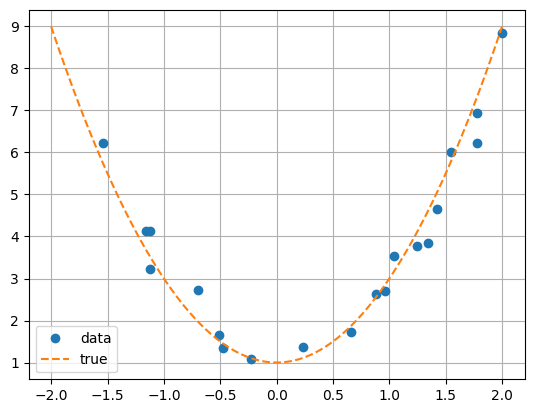

In [286]:
plt.plot(xs.detach().numpy(), ys.detach().numpy(), 'o',label='data')
plt.plot(x.detach().numpy(), f(x).detach().numpy(), '--',label='true')
plt.legend()
plt.grid()
plt.show()

### Training loop

In [287]:
def param_space(a,modela,x,y):
    model_a = modela.detach().numpy()
    loss_a = (1+a*x**2-y*torch.ones_like(a))**2
    loss_modela= ((1+modela*x**2-y)**2).detach().numpy()
    fig, ax = plt.subplots()
    
    ax.scatter(model_a,loss_modela, color='red')
    ax.plot(a.detach().numpy(),loss_a.detach().numpy() )
    ax.set_ylim(0,10)
    ax.grid()
    fig.canvas.draw()
    frame_image = np.array(fig.canvas.buffer_rgba())[..., :3]  # (H,W,3)
    plt.ylim(0, 10)
    plt.close(fig)
    return frame_image


def train(model, opt, loss_fn, data, epochs=20, batch_size=1,record_param=""):
    xs, ys = data
    N = xs.shape[0]
    model.train()
    losses = []
    if record_param!="":
        frames=[]
    for epoch in range(epochs):
        perm = torch.randperm(N)  # shuffle for stochasticity each epoch
        for i in range(0, N, batch_size):
            batch_idx = perm[i:i + batch_size]
            x = xs[batch_idx]
            y = ys[batch_idx]

            opt.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            if record_param!="":
                a = torch.linspace(-4, 4, 100, requires_grad=True)
                frame_image=param_space(a,model.a,xs[i],ys[i])
                frames.append(frame_image)
            opt.step()
        losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    if record_param!="":
        imageio.mimsave(record_param+".mp4", frames, fps=20) 

        Video(record_param+".mp4", embed=True, html_attributes="controls autoplay loop")
            
    return losses

def compare_losses(loss,nn_loss,title):
    plt.plot(nn_loss,linestyle="-",label="nn_loss")
    plt.plot(loss,linestyle="--",label="loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

## Parameters

In [288]:
lr = 0.0005
momentum = 0.9
dampening = 0.0
weight_decay= 0.0005
nesterov = False




class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(-2*torch.ones(1))

    def forward(self, x):
        return 1 + self.a * x**2
record_name = ["full_batch_gd","sgd","mini_batch_gd"]   

# class Model(MLP):
#     def __init__(self):
#         super().__init__(input_dim=1,output_dim=1,hidden_dims=[512,512,512],activation=nn.Tanh())

# record_name = 3*[""] 

loss_fn = nn.MSELoss()  

### 1. Full-Batch Gradient Descent

#### torch

In [289]:
model = Model()
opt = torch.optim.SGD(model.parameters(),
                      lr=lr,
                      momentum=momentum,
                      dampening=dampening,
                      weight_decay=weight_decay,
                      nesterov=nesterov)
nn_loss = train(model,opt,loss_fn,(xs,ys),epochs=150,batch_size=N,record_param=record_name[0])

Epoch 1/150, Loss: 50.5777
Epoch 2/150, Loss: 50.2493
Epoch 3/150, Loss: 49.6294
Epoch 4/150, Loss: 48.7544
Epoch 5/150, Loss: 47.6596
Epoch 6/150, Loss: 46.3788
Epoch 7/150, Loss: 44.9437
Epoch 8/150, Loss: 43.3840
Epoch 9/150, Loss: 41.7270
Epoch 10/150, Loss: 39.9975
Epoch 11/150, Loss: 38.2179
Epoch 12/150, Loss: 36.4084
Epoch 13/150, Loss: 34.5868
Epoch 14/150, Loss: 32.7686
Epoch 15/150, Loss: 30.9673
Epoch 16/150, Loss: 29.1946
Epoch 17/150, Loss: 27.4601
Epoch 18/150, Loss: 25.7721
Epoch 19/150, Loss: 24.1371
Epoch 20/150, Loss: 22.5604
Epoch 21/150, Loss: 21.0460
Epoch 22/150, Loss: 19.5968
Epoch 23/150, Loss: 18.2148
Epoch 24/150, Loss: 16.9011
Epoch 25/150, Loss: 15.6561
Epoch 26/150, Loss: 14.4796
Epoch 27/150, Loss: 13.3707
Epoch 28/150, Loss: 12.3282
Epoch 29/150, Loss: 11.3505
Epoch 30/150, Loss: 10.4357
Epoch 31/150, Loss: 9.5817
Epoch 32/150, Loss: 8.7860
Epoch 33/150, Loss: 8.0461
Epoch 34/150, Loss: 7.3596
Epoch 35/150, Loss: 6.7238
Epoch 36/150, Loss: 6.1359
Epoch 3

### custom

Epoch 1/150, Loss: 50.5777
Epoch 2/150, Loss: 50.2493
Epoch 3/150, Loss: 49.6294
Epoch 4/150, Loss: 48.7544
Epoch 5/150, Loss: 47.6596
Epoch 6/150, Loss: 46.3788
Epoch 7/150, Loss: 44.9437
Epoch 8/150, Loss: 43.3840
Epoch 9/150, Loss: 41.7270
Epoch 10/150, Loss: 39.9975
Epoch 11/150, Loss: 38.2179
Epoch 12/150, Loss: 36.4084
Epoch 13/150, Loss: 34.5868
Epoch 14/150, Loss: 32.7686
Epoch 15/150, Loss: 30.9673
Epoch 16/150, Loss: 29.1946
Epoch 17/150, Loss: 27.4601
Epoch 18/150, Loss: 25.7721
Epoch 19/150, Loss: 24.1371
Epoch 20/150, Loss: 22.5604
Epoch 21/150, Loss: 21.0460
Epoch 22/150, Loss: 19.5968
Epoch 23/150, Loss: 18.2148
Epoch 24/150, Loss: 16.9011
Epoch 25/150, Loss: 15.6561
Epoch 26/150, Loss: 14.4796
Epoch 27/150, Loss: 13.3707
Epoch 28/150, Loss: 12.3282
Epoch 29/150, Loss: 11.3505
Epoch 30/150, Loss: 10.4357
Epoch 31/150, Loss: 9.5817
Epoch 32/150, Loss: 8.7860
Epoch 33/150, Loss: 8.0461
Epoch 34/150, Loss: 7.3596
Epoch 35/150, Loss: 6.7238
Epoch 36/150, Loss: 6.1359
Epoch 3

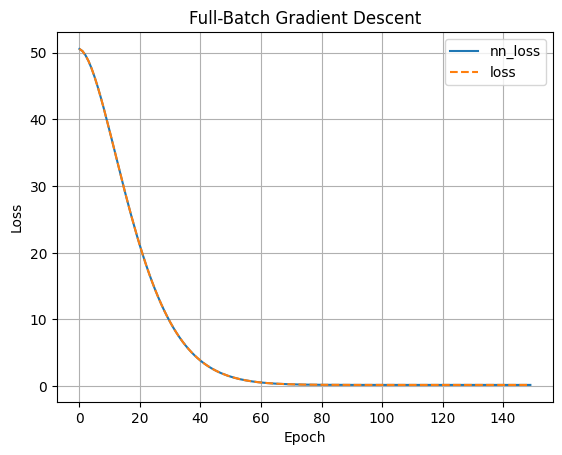

In [290]:
model = Model()
opt = SGD(model.parameters(),
          lr=lr,
          momentum=momentum,
          dampening=dampening,
          weight_decay=weight_decay,
          nesterov=nesterov)
loss = train(model,opt,loss_fn,(xs,ys),epochs=150,batch_size=N)
compare_losses(loss, nn_loss,"Full-Batch Gradient Descent")

# Evaluation

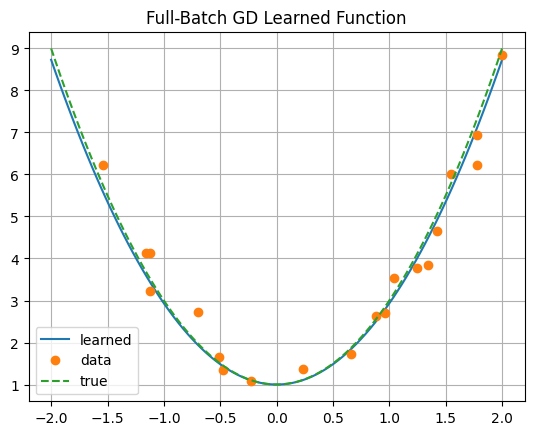

In [291]:
plt.plot(x_eval,model(x_eval[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.plot(xs.detach().numpy(), ys.detach().numpy(), 'o',label='data')
plt.plot(x_eval,f(x_eval), '--',label='true')
plt.legend()
plt.title("Full-Batch GD Learned Function")
plt.grid()
plt.show()

### 2. Stochastic Gradient Descent

#### torch

In [292]:
torch.manual_seed(0)
model = Model()
opt = torch.optim.SGD(model.parameters(),
                      lr=lr,
                      momentum=momentum,
                      dampening=dampening,
                      weight_decay=weight_decay,
                      nesterov=nesterov)

nn_loss = train(model,opt,loss_fn,(xs,ys),epochs=50,batch_size=1,record_param=record_name[1])

Epoch 1/50, Loss: 58.8739
Epoch 2/50, Loss: 0.1954
Epoch 3/50, Loss: 1.9072
Epoch 4/50, Loss: 0.0045
Epoch 5/50, Loss: 0.5939
Epoch 6/50, Loss: 0.5918
Epoch 7/50, Loss: 0.1787
Epoch 8/50, Loss: 0.0503
Epoch 9/50, Loss: 0.2151
Epoch 10/50, Loss: 0.0096
Epoch 11/50, Loss: 0.0566
Epoch 12/50, Loss: 0.0440
Epoch 13/50, Loss: 0.0474
Epoch 14/50, Loss: 0.5139
Epoch 15/50, Loss: 0.0198
Epoch 16/50, Loss: 0.0189
Epoch 17/50, Loss: 0.0121
Epoch 18/50, Loss: 0.0108
Epoch 19/50, Loss: 0.0226
Epoch 20/50, Loss: 0.0677
Epoch 21/50, Loss: 0.0198
Epoch 22/50, Loss: 0.0007
Epoch 23/50, Loss: 0.0007
Epoch 24/50, Loss: 0.0425
Epoch 25/50, Loss: 0.0092
Epoch 26/50, Loss: 0.0298
Epoch 27/50, Loss: 0.6006
Epoch 28/50, Loss: 0.0235
Epoch 29/50, Loss: 0.2846
Epoch 30/50, Loss: 0.2753
Epoch 31/50, Loss: 0.0105
Epoch 32/50, Loss: 0.9193
Epoch 33/50, Loss: 0.4689
Epoch 34/50, Loss: 0.1648
Epoch 35/50, Loss: 0.6045
Epoch 36/50, Loss: 0.0292
Epoch 37/50, Loss: 0.0124
Epoch 38/50, Loss: 0.0098
Epoch 39/50, Loss: 0

#### custom

In [293]:
torch.manual_seed(0)
model = Model()
opt = SGD(model.parameters(),
          lr=lr,
          momentum=momentum,
          dampening=dampening,
          weight_decay=weight_decay,
          nesterov=nesterov)

loss = train(model,opt,loss_fn,(xs,ys),epochs=50,batch_size=1)

Epoch 1/50, Loss: 58.8739
Epoch 2/50, Loss: 0.1954
Epoch 3/50, Loss: 1.9072
Epoch 4/50, Loss: 0.0045
Epoch 5/50, Loss: 0.5939
Epoch 6/50, Loss: 0.5918
Epoch 7/50, Loss: 0.1787
Epoch 8/50, Loss: 0.0503
Epoch 9/50, Loss: 0.2151
Epoch 10/50, Loss: 0.0096
Epoch 11/50, Loss: 0.0566
Epoch 12/50, Loss: 0.0440
Epoch 13/50, Loss: 0.0474
Epoch 14/50, Loss: 0.5139
Epoch 15/50, Loss: 0.0198
Epoch 16/50, Loss: 0.0189
Epoch 17/50, Loss: 0.0121
Epoch 18/50, Loss: 0.0108
Epoch 19/50, Loss: 0.0226
Epoch 20/50, Loss: 0.0677
Epoch 21/50, Loss: 0.0198
Epoch 22/50, Loss: 0.0007
Epoch 23/50, Loss: 0.0007
Epoch 24/50, Loss: 0.0425
Epoch 25/50, Loss: 0.0092
Epoch 26/50, Loss: 0.0298
Epoch 27/50, Loss: 0.6006
Epoch 28/50, Loss: 0.0235
Epoch 29/50, Loss: 0.2846
Epoch 30/50, Loss: 0.2753
Epoch 31/50, Loss: 0.0105
Epoch 32/50, Loss: 0.9193
Epoch 33/50, Loss: 0.4689
Epoch 34/50, Loss: 0.1648
Epoch 35/50, Loss: 0.6045
Epoch 36/50, Loss: 0.0292
Epoch 37/50, Loss: 0.0124
Epoch 38/50, Loss: 0.0098
Epoch 39/50, Loss: 0

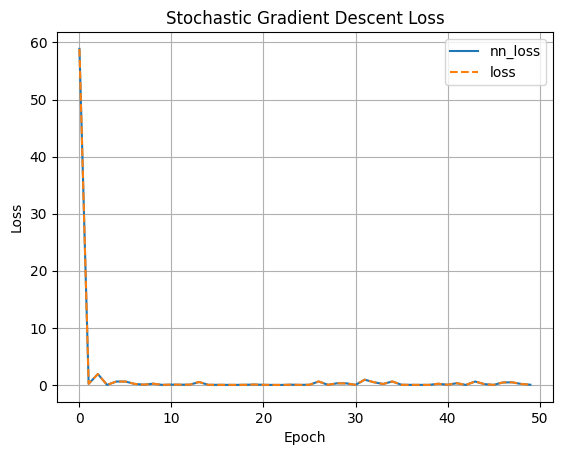

In [294]:
compare_losses(loss, nn_loss,"Stochastic Gradient Descent Loss")

# Evaluation

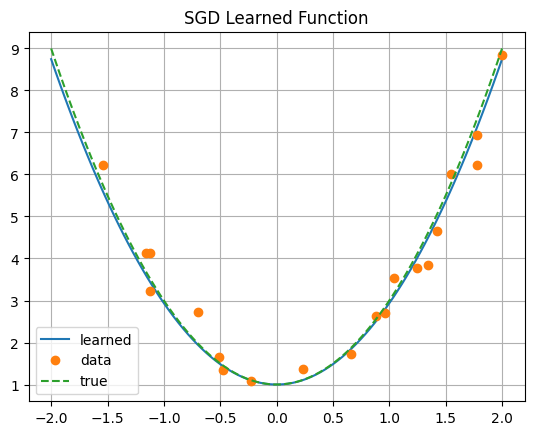

In [295]:
plt.plot(x_eval,model(x_eval[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.plot(xs.detach().numpy(), ys.detach().numpy(), 'o',label='data')
plt.plot(x_eval,f(x_eval), '--',label='true')
plt.title("SGD Learned Function")
plt.legend()
plt.grid()
plt.show()

### 3. Mini-Batch Gradient Descent

#### torch

In [296]:
torch.manual_seed(0)
model = Model()
opt = torch.optim.SGD(model.parameters(),
                      lr=lr,
                      momentum=momentum,
                      dampening=dampening,
                      weight_decay=weight_decay,
                      nesterov=nesterov)

nn_loss = train(model,opt,loss_fn,(xs,ys),epochs=20,batch_size=4,record_param=record_name[2])

Epoch 1/20, Loss: 46.6140
Epoch 2/20, Loss: 58.0805
Epoch 3/20, Loss: 80.2916
Epoch 4/20, Loss: 15.9128
Epoch 5/20, Loss: 6.0494
Epoch 6/20, Loss: 7.8997
Epoch 7/20, Loss: 17.5723
Epoch 8/20, Loss: 4.0828
Epoch 9/20, Loss: 1.9142
Epoch 10/20, Loss: 2.9254
Epoch 11/20, Loss: 0.2531
Epoch 12/20, Loss: 0.6970
Epoch 13/20, Loss: 0.4577
Epoch 14/20, Loss: 0.6665
Epoch 15/20, Loss: 0.2407
Epoch 16/20, Loss: 0.3437
Epoch 17/20, Loss: 0.1056
Epoch 18/20, Loss: 0.3376
Epoch 19/20, Loss: 0.1022
Epoch 20/20, Loss: 0.0350


#### custom

In [297]:
torch.manual_seed(0)
model = Model()
opt = SGD(model.parameters(),
          lr=lr,
          momentum=momentum,
          dampening=dampening,
          weight_decay=weight_decay,
          nesterov=nesterov)

loss = train(model,opt,loss_fn,(xs,ys),epochs=20,batch_size=4)

Epoch 1/20, Loss: 46.6140
Epoch 2/20, Loss: 58.0805
Epoch 3/20, Loss: 80.2916
Epoch 4/20, Loss: 15.9128
Epoch 5/20, Loss: 6.0494
Epoch 6/20, Loss: 7.8997
Epoch 7/20, Loss: 17.5723
Epoch 8/20, Loss: 4.0828
Epoch 9/20, Loss: 1.9142
Epoch 10/20, Loss: 2.9254
Epoch 11/20, Loss: 0.2531
Epoch 12/20, Loss: 0.6970
Epoch 13/20, Loss: 0.4577
Epoch 14/20, Loss: 0.6665
Epoch 15/20, Loss: 0.2407
Epoch 16/20, Loss: 0.3437
Epoch 17/20, Loss: 0.1056
Epoch 18/20, Loss: 0.3376
Epoch 19/20, Loss: 0.1022
Epoch 20/20, Loss: 0.0350


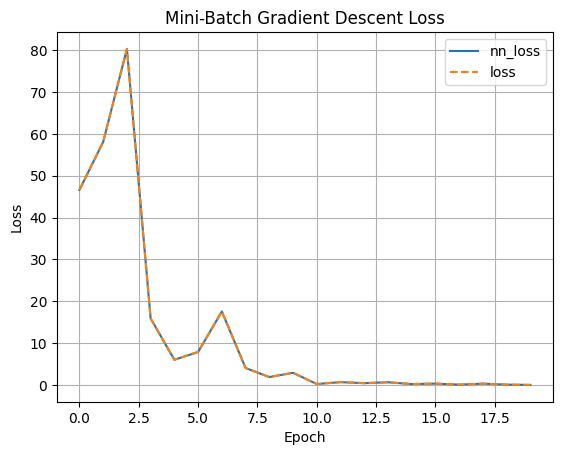

In [298]:
compare_losses(loss, nn_loss,"Mini-Batch Gradient Descent Loss")

# Evaluation

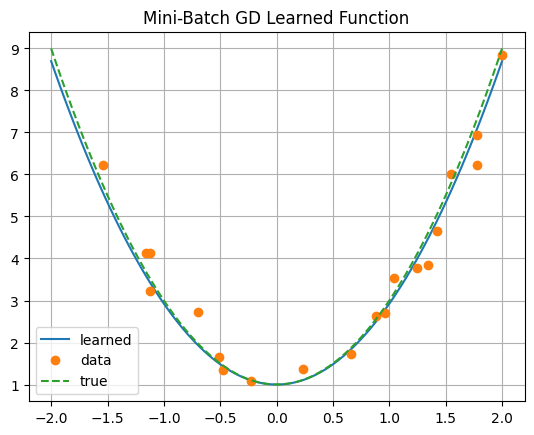

In [299]:
plt.plot(x_eval,model(x_eval[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.plot(xs.detach().numpy(), ys.detach().numpy(), 'o',label='data')
plt.plot(x_eval,f(x_eval), '--',label='true')
plt.title("Mini-Batch GD Learned Function")
plt.legend()
plt.grid()
plt.show()

## Parameter Space

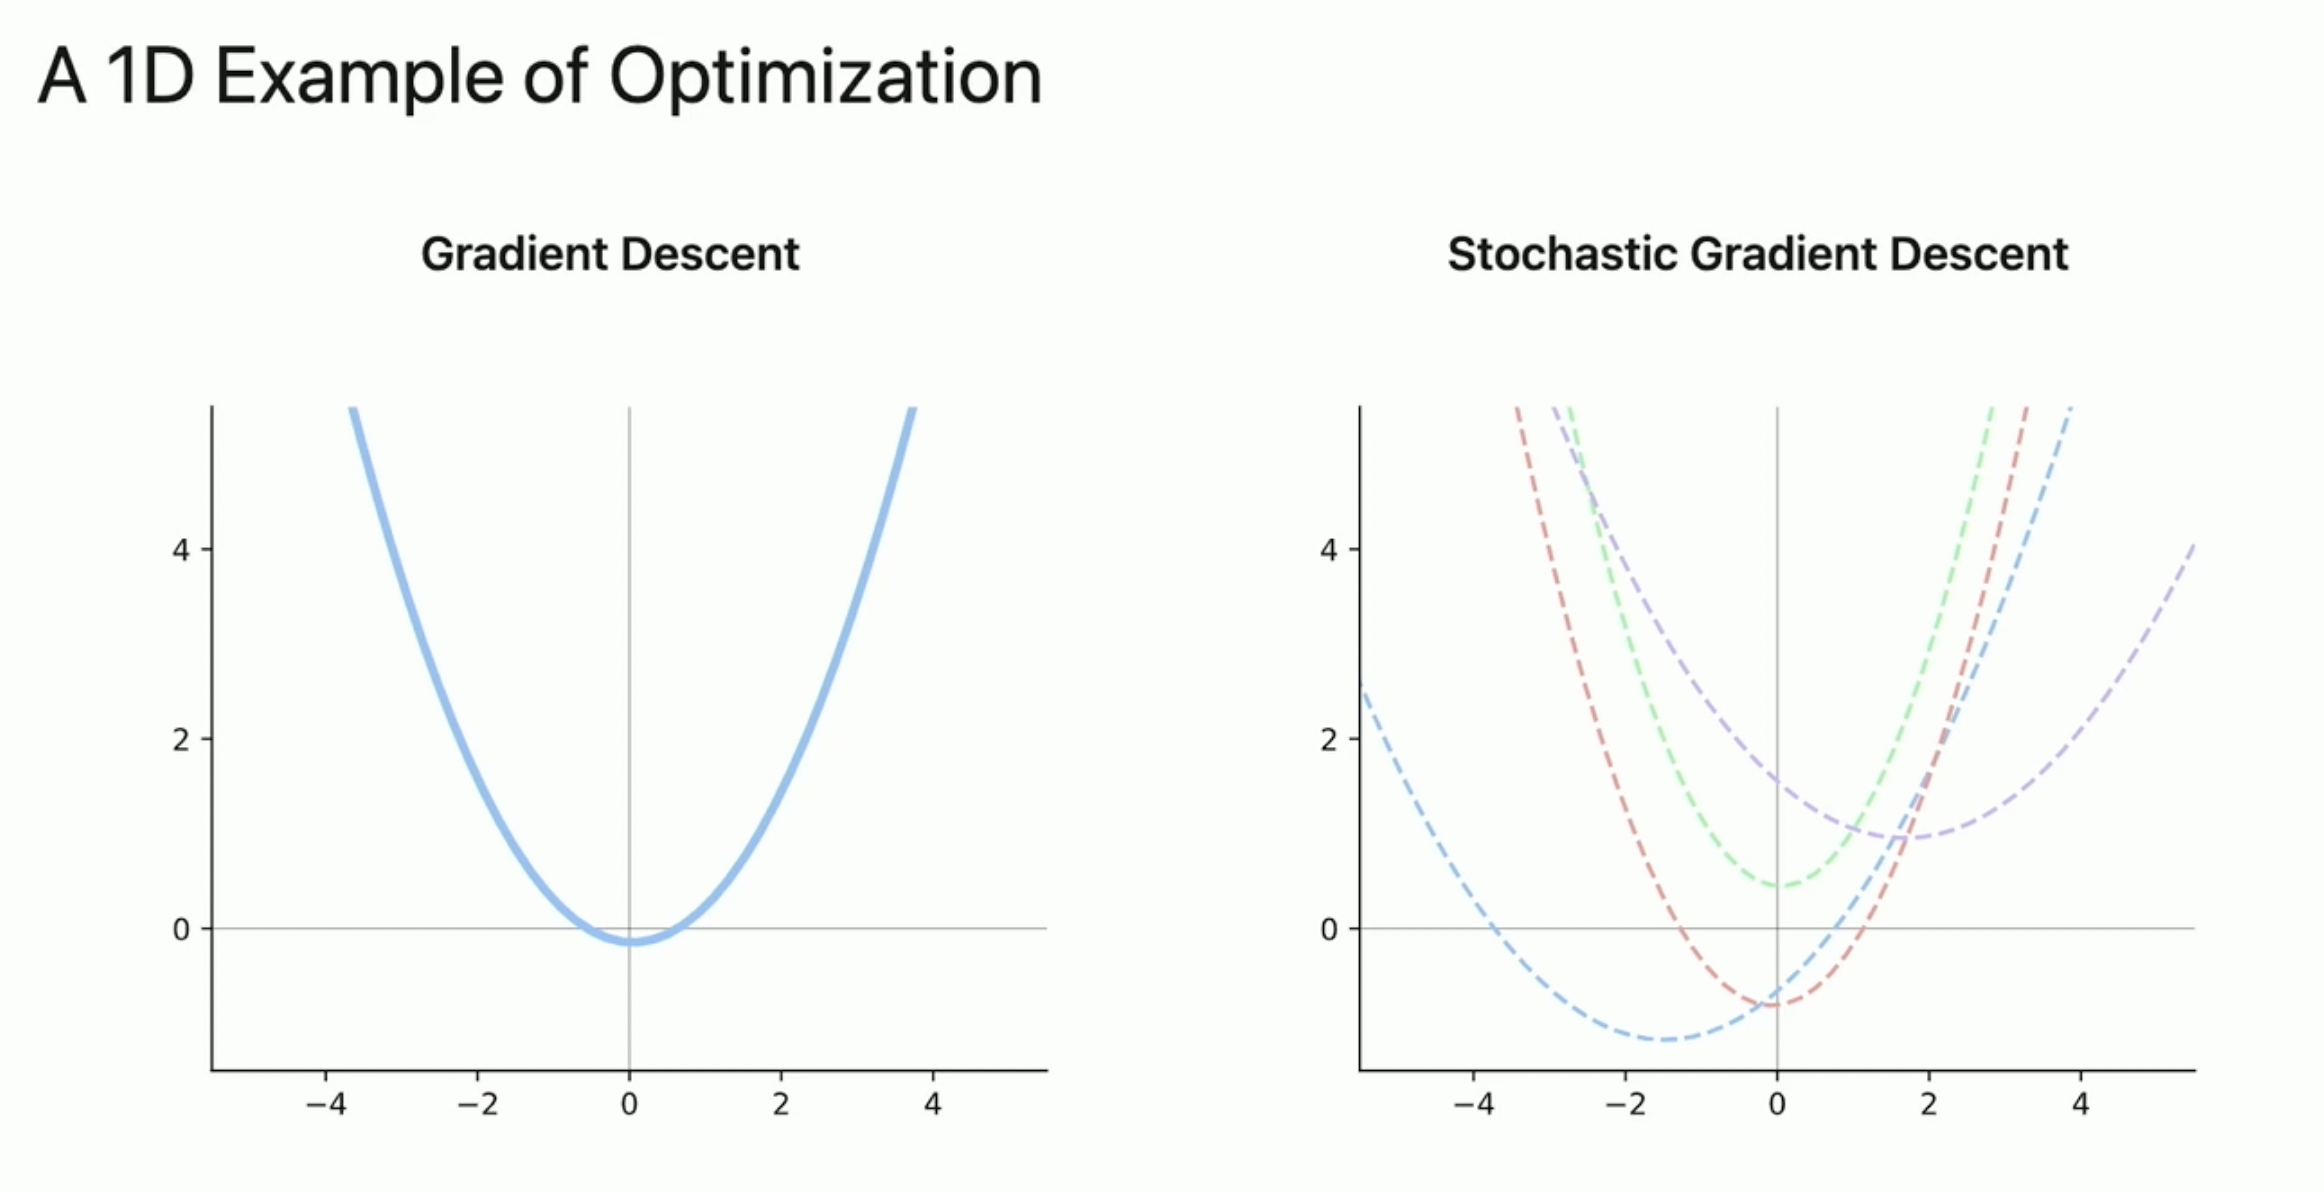